In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [13]:
df = pd.read_csv("C:/Personal/Susi/Barcelona_Activa/Project/Dataset/ai_job_dataset.csv")


In [15]:
df1 = df.copy()

In [17]:
df1.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [19]:
experience_map = {"EN": 0, "MI": 1, "SE": 2, "EX": 3}
education_map = {"Associate": 0, "Bachelor": 1, "Master": 2, "PhD": 3}
company_size_map = {"S": 0, "M": 1, "L": 2}

df["experience_level"] = df["experience_level"].map(experience_map)
df["education_required"] = df["education_required"].map(education_map)
df["company_size"] = df["company_size"].map(company_size_map)


In [21]:
features = df[
    [
        "salary_usd",
        "remote_ratio",
        "years_experience",
        "job_description_length",
        "benefits_score",
        "experience_level",
        "education_required",
        "company_size"
    ]
]


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


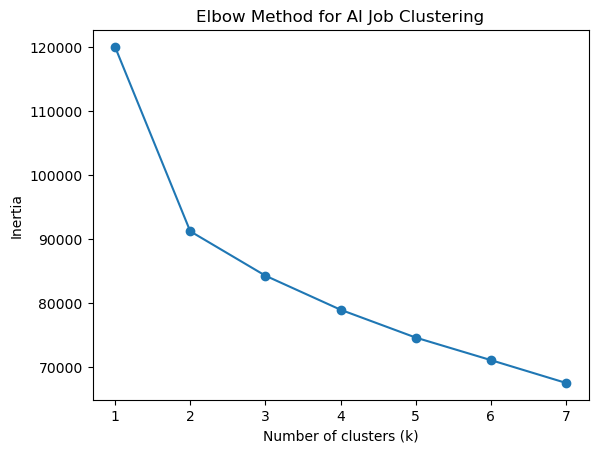

In [25]:
inertia = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for AI Job Clustering")
plt.show()


In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


In [29]:
cluster_summary = df.groupby("cluster")[
    [
        "salary_usd",
        "remote_ratio",
        "years_experience",
        "benefits_score"
    ]
].mean()

print(cluster_summary)


            salary_usd  remote_ratio  years_experience  benefits_score
cluster                                                               
0         80794.069261     71.546693          3.214202        7.501654
1        183136.170544     51.654216         13.125507        7.503138
2         88301.449662     25.603865          3.050048        7.507903


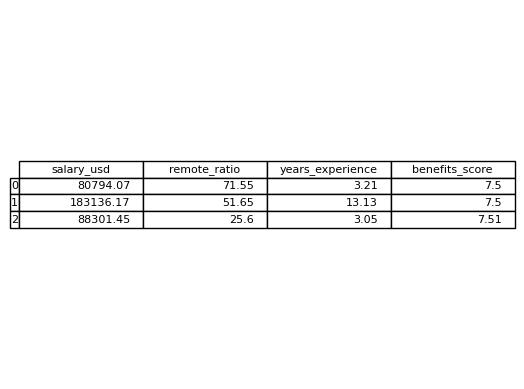

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axis('off')
ax.table(
    cellText=cluster_summary.round(2).values,
    colLabels=cluster_summary.columns,
    rowLabels=cluster_summary.index,
    loc='center'
)

plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\cluster_summary.png", bbox_inches="tight")


In [ ]:
df[["job_title", "industry", "salary_usd", "cluster"]].sort_values("cluster")


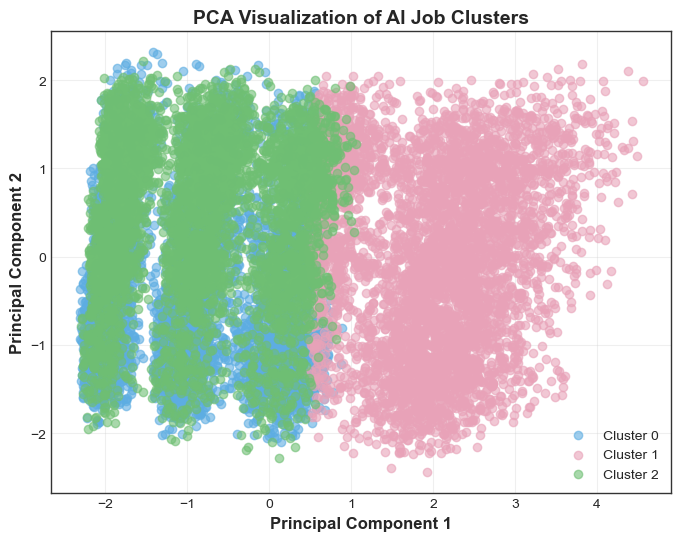

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
for cluster in sorted(df["cluster"].unique()):
    plt.scatter(
        X_pca[df["cluster"] == cluster, 0],
        X_pca[df["cluster"] == cluster, 1],
        label=f"Cluster {cluster}",
        alpha=0.6
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of AI Job Clusters")
plt.legend()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\Jobcluster", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 800x600 with 0 Axes>

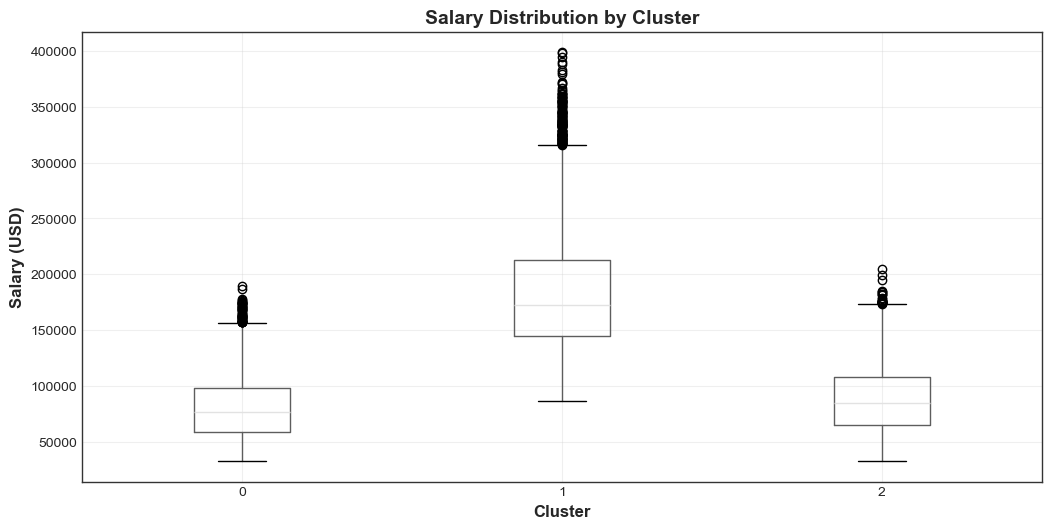

In [125]:
plt.figure(figsize=(8,6))
df.boxplot(column="salary_usd", by="cluster")
plt.title("Salary Distribution by Cluster")
plt.suptitle("")  # removes default subtitle
plt.xlabel("Cluster")
plt.ylabel("Salary (USD)")
plt.show()


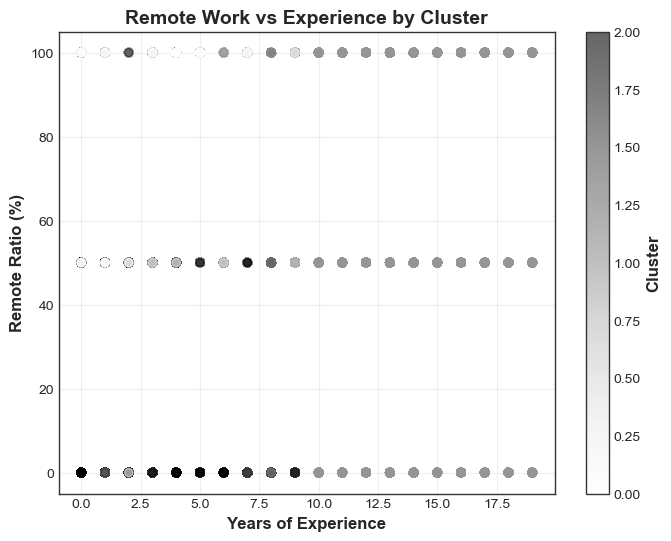

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["years_experience"],
    df["remote_ratio"],
    c=df["cluster"],
    alpha=0.6
)

plt.xlabel("Years of Experience")
plt.ylabel("Remote Ratio (%)")
plt.title("Remote Work vs Experience by Cluster")
plt.colorbar(label="Cluster")
plt.show()


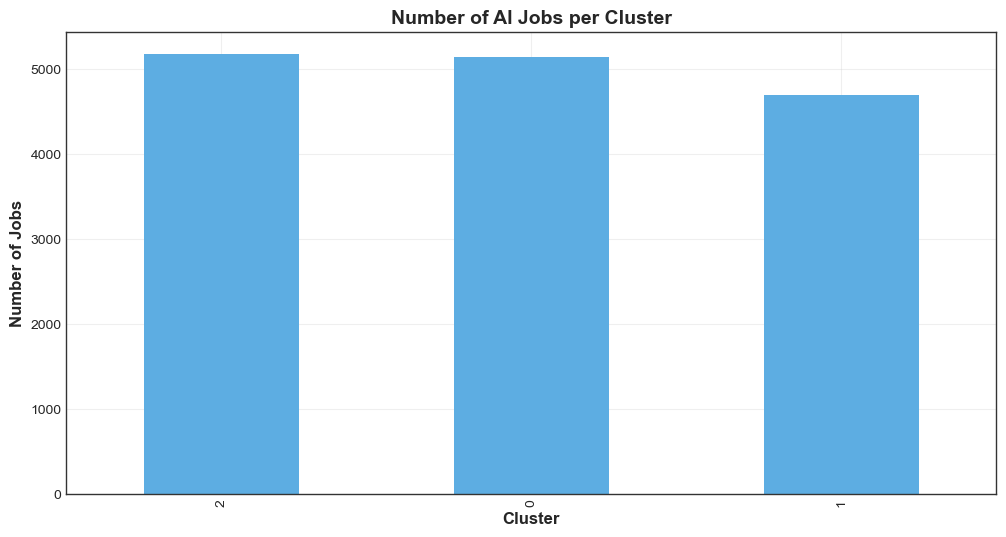

In [128]:
df["cluster"].value_counts().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Number of Jobs")
plt.title("Number of AI Jobs per Cluster")
plt.show()
